In [1]:
using PyPlot
using LaTeXStrings
using Measurements

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/kunchen/.julia/packages/PyPlot/XaELc/src/init.jl:198


In [2]:
include("Kplot.jl")

In [62]:
#para = ParaMC(rs = 5.0, Fs =-1.0, beta =100.0, mass2=1.0e-5, order = 2)
#Zrenorm = true

para = ParaMC(rs = 5.0, Fs =-0.0, beta =25.0, mass2=0.01, order = 3)
Zrenorm = false

Base.Iterators.Pairs{Symbol, Real, Tuple{Symbol, Symbol}, NamedTuple{(:Λs, :spin), Tuple{Float64, Int64}}}(:Λs => 0.01, :spin => 2)


false

In [63]:
rsigma, isigma, kgrid = process(para, Zrenorm)

LoadError: KeyError: key "Fa_-0.0_Fs_-0.0_beta_25.0_dim_3_isDynamic_true_isFock_false_mass2_0.01_massratio_1.0_rs_5.0_spin_2" not found

In [48]:
dim, β, kF = para.dim, para.β, para.kF
kF_label = searchsortedfirst(kgrid.grid, kF)

10

In [49]:
# Vibrant qualitative colour scheme from https://personal.sron.nl/~pault/
cdict=Dict(["blue" => "#0077BB", "cyan" => "#33BBEE", "teal" => "#009988", "orange" => "#EE7733", "red"=> "#CC3311", "magenta"=>"#EE3377", "grey"=>"#BBBBBB"]);

# Plot $\frac{\partial \Sigma(k, i\omega_0)}{\partial i\omega}$ as a function $k$

In [50]:
Sw_k = []
for val in isigma
    push!(Sw_k, zfactor(val, para))
end

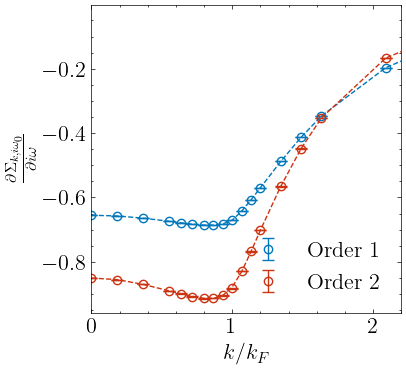

Any[-0.67048 ± 9.7e-5, -0.8829 ± 0.0014]


In [58]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(4,4))
dZ = []
for o in 1:para.order
    y = sum([-z.val for z in Sw_k[j]] for j in 1:o)
    #y = [-z.val for z in Sw_k[o]]
    e = [z.err for z in Sw_k[o]]
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dZ, measurement(y[kF_label], e[kF_label]))
    # yfit = signal.savgol_filter(y, 5, 3)
    x = kgrid.grid / kF
    spl = interp.UnivariateSpline(x, y, w=1.0 ./ e)
    yfit = spl(x)
    plot(x, yfit, color=color[o], linestyle="--")
end
xlim([kgrid.grid[1] / kF, 2.2])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot \frac{\partial \Sigma_{k, i\omega_0}}{\partial i \omega}$")
else
    ylabel(L"$\frac{\partial \Sigma_{k, i\omega_0}}{\partial i \omega}$")
end
legend(loc=4)
#savefig("sigmaZ_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dZ)
#plot.plt.show()

# Plot $Re\Sigma(k, i\omega_0)$ as a function $k$

In [59]:
S_k = []
for val in rsigma
    #push!(S_k, val[1, :].-val[1, kF_label])
    push!(S_k, val[1, :].-val[1, 1])
    #push!(S_k, val[1, :])
end

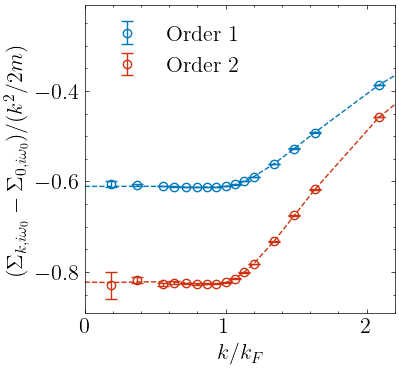

Any[-0.6108 ± 0.00021, -0.82245 ± 0.00096]


In [60]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(4,4))
dmp = []
for o in 1:para.order
    y = sum([z.val for z in S_k[j]] for j in 1:o)
    #y = [z.val for z in S_k[o]]
    e = [z.err for z in S_k[o]]
    #y ./= para.EF
    #e ./=para.EF
    y ./= (kgrid.grid).^2/(2*para.me)
    e ./= (kgrid.grid).^2/(2*para.me)
    # println(zk[o])
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dmp, measurement(y[kF_label], e[kF_label]))
    # yfit = signal.savgol_filter(y, 5, 3)
    x = kgrid.grid / kF
    y[1:3] .= y[kF_label]
    e[1:3] .= e[kF_label]
    spl = interp.UnivariateSpline(x, y, w=1.0 ./ e)
    yfit = spl(x)
    plot(x, yfit, color=color[o], linestyle="--")
    #println(y)
    #println(yfit)
end
#xlim([kgrid.grid[1] / kF, kgrid.grid[end] / kF])
xlim([kgrid.grid[1] / kF, 2.2])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot (\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
else
    ylabel(L"$(\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
end
legend(loc=2)
#savefig("sigmaK_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dmp)

In [54]:
println(dZ)
if Zrenorm == false
    z = @. 1.0/(1.0-dZ)
    m = @. 1.0/((1.0-dmp)/(1.0-dZ))
    #m = @. 1.0/(z*(1.0-dm))
    println("zfactor: $z")
    println("massratio: $m")
else
    z = @. 1.0+dZ
    m = @. ((1.0+dmp)/(1.0+dZ))
    println("zfactor: $z")
    println("massratio: $m")
end

Any[-0.67048 ± 9.7e-5, -0.8829 ± 0.0014]
zfactor: Measurement{Float64}[0.59863 ± 3.5e-5, 0.53109 ± 0.00041]
massratio: Measurement{Float64}[1.03705 ± 0.00015, 1.03317 ± 0.00096]


# Effective Mass

In [55]:
S_m = []
for val in rsigma
    push!(S_m, @. (val[1, :]-val[1, kF_label])/(kgrid.grid-kgrid.grid[kF_label])*para.me/para.kF)
end

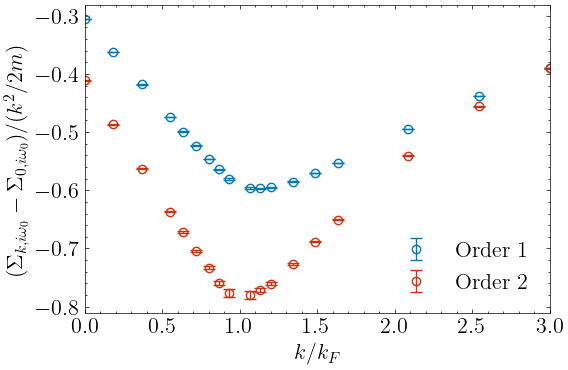

Any[-0.5807 ± 0.0013, -0.7765 ± 0.0068]
Any[-0.5958 ± 0.0013, -0.7797 ± 0.0068]
Any[-0.5883 ± 0.0089, -0.7781 ± 0.0084]


In [56]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(6,4))
dm1, dm2, dm3 = [], [], []
for o in 1:para.order
    y = sum([z.val for z in S_m[j]] for j in 1:o)
    e = [z.err for z in S_m[o]]
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dm1, measurement(y[kF_label-1], e[kF_label-1]))
    push!(dm2, measurement(y[kF_label+1], e[kF_label+1]))
    push!(dm3, measurement((y[kF_label+1]+y[kF_label-1])/2, (e[kF_label+1]+e[kF_label-1])/2+abs(y[kF_label+1]-y[kF_label-1])/2))
    # yfit = signal.savgol_filter(y, 5, 3)
    #x = kgrid.grid 
    #spl = interp.UnivariateSpline(x, y, w=1.0 ./ e).derivative(n=1)
    #yfit = spl(x)*para.me/para.kF
    #plot(x/kF, yfit, color=color[o], linestyle="--")
end
#xlim([kgrid.grid[1] / kF, kgrid.grid[end] / kF])
xlim([kgrid.grid[1] / kF, 3.0])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot \operatorname{Re}\delta \Sigma(k, i\omega_0)/E_F$")
else
    ylabel(L"$(\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
end
legend(loc=4)
#savefig("sigmaK_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dm1)
println(dm2)
println(dm3)

In [57]:
if Zrenorm == false
    z = @. 1.0/(1.0-dZ)
    #m = @. 1.0/((1.0-dm)/(1.0-dZ))
    m1 = @. 1.0/(z*(1.0-dm1))
    m2 = @. 1.0/(z*(1.0-dm2))
    m3 = @. 1.0/(z*(1.0-dm3))
    println("zfactor: $z")
    println("massratio: $m1")
    println("massratio: $m2")
    println("massratio: $m3")
else
    z = @. 1.0+dZ
    m1 = @. ((1.0+dm1)/(1.0+dZ))
    m2 = @. ((1.0+dm2)/(1.0+dZ))
    m3 = @. ((1.0+dm3)/(1.0+dZ))
    println("zfactor: $z")
    println("massratio: $m1")
    println("massratio: $m2")
    println("massratio: $m3")
end

zfactor: Measurement{Float64}[0.59863 ± 3.5e-5, 0.53109 ± 0.00041]
massratio: Measurement{Float64}[1.05679 ± 0.0009, 1.0599 ± 0.0041]
massratio: Measurement{Float64}[1.04677 ± 0.00085, 1.058 ± 0.0041]
massratio: Measurement{Float64}[1.0518 ± 0.0059, 1.0589 ± 0.0051]


In [34]:
1-0.5

0.5